# Sales Prediction

Problem Statement
Build a model which predicts sales based on the money spent on different platforms for marketing.

Reading the data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Advertising.csv')
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


Data cleaning 

In [30]:
data.shape

(200, 4)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [32]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [3]:
data=data.drop(['Unnamed: 0'],axis=1)
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


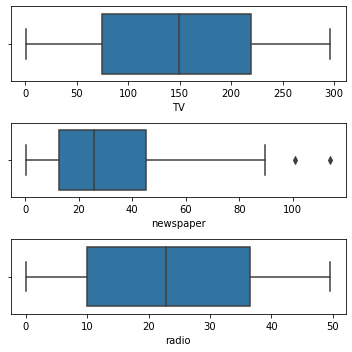

In [35]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['radio'], ax = axs[2])
plt.tight_layout()

# Exploratory Data Analysis

Univariate Analysis

Sales (Target Variable)

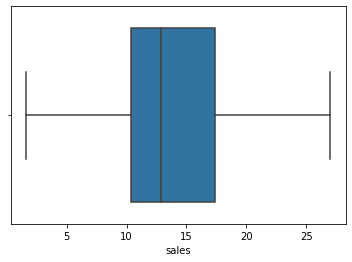

In [37]:
sns.boxplot(data['sales'])
plt.show()

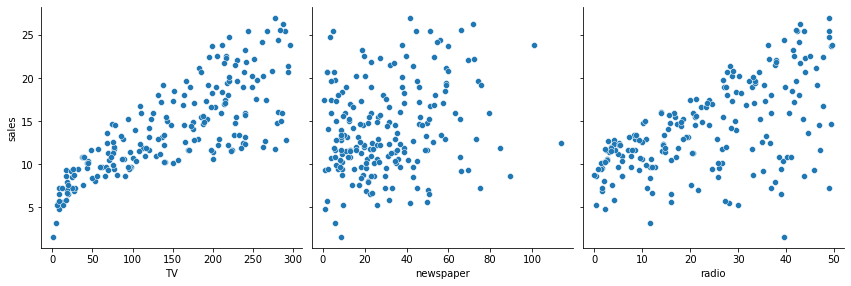

In [38]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(data, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

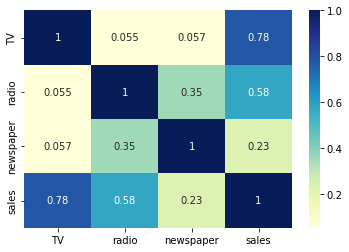

In [39]:
# Let's see the correlation between different variables.
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.

# Model Building

Train the model

In [4]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [5]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [6]:
lr= LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [7]:
pred1=lr.predict(xtest)

In [8]:
lr.score(xtest,ytest)

0.9224605706201435

In [9]:
lr.coef_

array([0.04695205, 0.17658644, 0.00185115])

In [10]:
train =lr.score(xtrain,ytrain)
test = lr.score(xtest,ytest)
print(f"Train Result:{train}\n Test result:{test}")

Train Result:0.8850053786777522
 Test result:0.9224605706201435


In [11]:
mse=mean_squared_error(ytest,pred1)
mae=mean_absolute_error(ytest,pred1)
rmse=np.sqrt(mse)
r2=r2_score(ytest,pred1)
print("MSE:",mse)
print("MAE:",mae)
print("RMSE:",rmse)
print("R2:",r2)

MSE: 1.9289249074665724
MAE: 1.0548328405073315
RMSE: 1.3888574107756968
R2: 0.9224605706201435


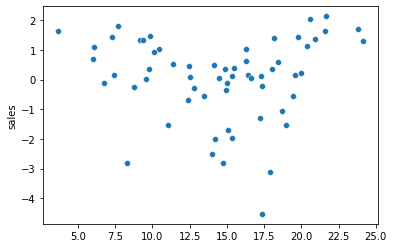

In [12]:
residual = ytest - pred1
plt.figure()
sns.scatterplot(pred1,residual)
plt.show()

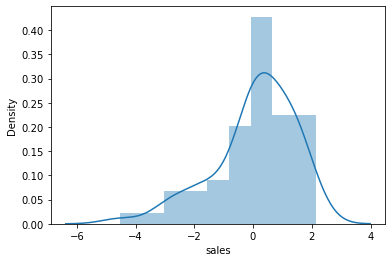

In [13]:
plt.figure()
sns.distplot(residual)
plt.show()

In [14]:
def poly_1(a):
    y=4*a+5
    return y
def poly_2(a):
    y=6*(a**2)+4*a+5
    return y
def poly_3(a):
    y=8*(a**3)+6*(a**2)+4*a+5
    return y
def plot(a,y):
    
    plt.figure()
    plt.plot(a,y)
    plt.show()

In [15]:
a=np.arange(-100,100)

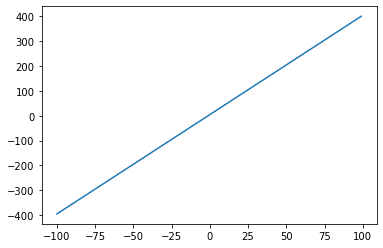

In [16]:
y=poly_1(a)
plot(a,y)

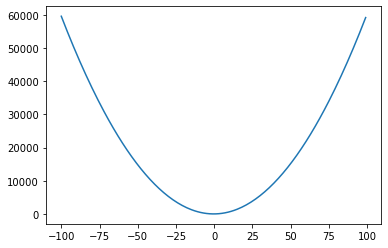

In [17]:
y=poly_2(a)
plot(a,y)

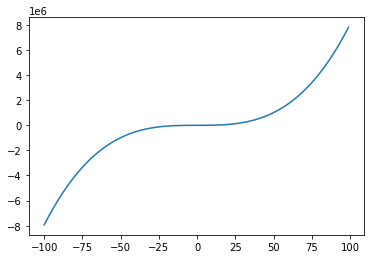

In [18]:
y=poly_3(a)
plot(a,y)

In [23]:
p=data[["TV","radio"]]
q=data["sales"]
ptrain,ptest,qtrain,qtest=train_test_split(p,q,test_size=0.3,random_state=1)

In [24]:
pol= PolynomialFeatures(2)
pol

PolynomialFeatures()

In [25]:
P_poly_train= pol.fit_transform(ptrain)
P_poly_test= pol.transform(ptest)

In [26]:
lin = LinearRegression()
lin.fit(P_poly_train,qtrain)
q_pred=lin.predict(P_poly_test)

In [27]:
po_mse=mean_squared_error(qtest,q_pred)
po_mae=mean_absolute_error(qtest,q_pred)
po_rmse=np.sqrt(mse)
po_r2=r2_score(qtest,q_pred)
print("MSE:",po_mse)
print("MAE:",po_mae)
print("RMSE:",po_rmse)
print("R2:",po_r2)

MSE: 0.172383450810035
MAE: 0.32918355440975683
RMSE: 1.3888574107756968
R2: 0.9930704848288282


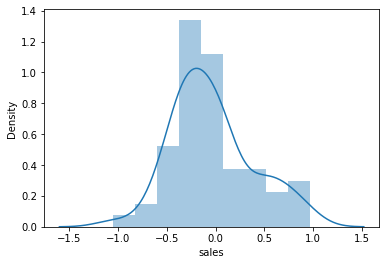

In [28]:
residual= qtest - q_pred
plt.figure()
sns.distplot(residual)
plt.show()